In [149]:
## Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import Data**

In [150]:
pathname = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(pathname,header = None)
df.head(5)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [151]:
df.columns = ['age','gender','bmi','no_of_children','smoker','region','charges']

In [152]:
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [154]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

**Filling Missing Values**

In [155]:
df['age']=pd.to_numeric(df['age'],errors='coerce')

In [156]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['age']=round(df['age'].astype(int),2)

C:\Users\Megha Nair\AppData\Local\Temp\ipykernel_5760\3677768669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [170]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [172]:
df.smoker.unique()

array(['1', '0', '?'], dtype=object)

In [182]:
df['smoker'] = pd.to_numeric(df['smoker'],errors = 'coerce')
df['smoker'].fillna(df['smoker'].mean(),inplace = True)
df['smoker']=round(df['smoker'].astype(int),2)

C:\Users\Megha Nair\AppData\Local\Temp\ipykernel_5760\516582664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].fillna(df['smoker'].mean(),inplace = True)


In [184]:
df.smoker.unique()

array([1, 0])

**EDA**

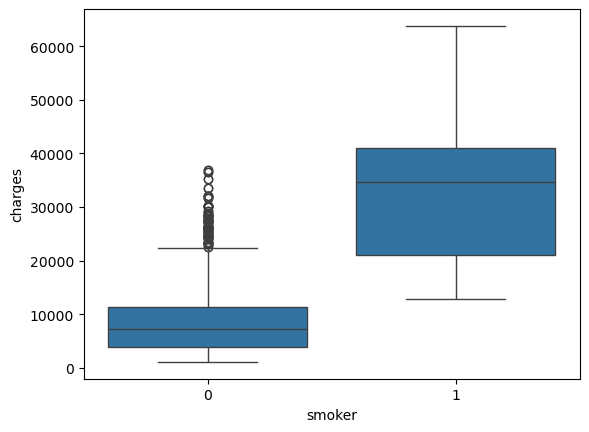

In [188]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

In [246]:
final_res = []

In [192]:
X = df.drop('charges',axis = 1)
y = df.charges

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42 )
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2217, 6) (555, 6) (2217,) (555,)


**Data Analysis**

In [198]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [200]:
y_pred = LR.predict(x_test)

In [248]:
from sklearn.metrics import r2_score
r2_score_LR = r2_score(y_test,y_pred)
r2_score_LR
final_res.append(r2_score_LR)

In [204]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [206]:
y_pred1 = RF.predict(x_test)

In [250]:
r2_score_RF = r2_score(y_test,y_pred1)
r2_score_RF
final_res.append(r2_score_RF)

In [210]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [212]:
y_pred2 = DT.predict(x_test)

In [252]:
r2_score_DT = r2_score(y_test,y_pred2)
r2_score_DT
final_res.append(r2_score_DT)

In [218]:
from sklearn.svm import SVR
SV = SVR()
SV.fit(x_train,y_train)

SVR()

In [220]:
y_pred3 = SV.predict(x_test)

In [254]:
r2_score_SV = r2_score(y_test,y_pred3)
r2_score_SV
final_res.append(r2_score_SV)

In [224]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [228]:
y_pred4 = KNN.predict(x_test)

In [256]:
r2_score_KNN = r2_score(y_test,y_pred4)
r2_score_KNN
final_res.append(r2_score_KNN)

In [232]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [234]:
y_pred5 = GBR.predict(x_test)

In [258]:
r2_score_GBR = r2_score(y_test,y_pred5)
r2_score_GBR
final_res.append(r2_score_GBR)

In [238]:
from sklearn.linear_model import Ridge
RD = Ridge()
RD.fit(x_train,y_train)

Ridge()

In [240]:
y_pred6 = RD.predict(x_test)

In [262]:
r2_score_RD = r2_score(y_test,y_pred6)
r2_score_RD
final_res.append(r2_score_RD)

**Conclusion**

In [264]:
final = np.array(final_res)
result = final.reshape(-1,1)
column = ['R2_Score']
Index = ['Linear Regression','Random Forest Regressor','Decision Tree Regressor','SVR','KNeighbors Regressor','GradientBoostingRegressor','Ridge']
final_result=pd.DataFrame(result,columns = column,index = Index)
final_result

,R2_Score
Linear Regression,0.739579
Random Forest Regressor,0.952235
Decision Tree Regressor,0.953485
SVR,-0.071012
KNeighbors Regressor,0.411278
GradientBoostingRegressor,0.874896
Ridge,0.739506


**We can conclude that Random Forest Regressor can be used as the best model as it returns with 95% accuracy.**